In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import itertools
import seaborn as sns

import pickle as pkl

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression

/tmp/ipykernel_6068/3185380185.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
filepath = "../../../../data/class_01/bikes.csv"
data = pd.read_csv(filepath)

In [10]:
X = data["hr"].values.reshape(-1,1)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    data["cnt"], 
                                                    test_size=0.15, 
                                                    random_state=42)

# let's further split the training set into a training and a validation set (15%)
X_train, X_val, y_train, y_val = train_test_split(X_train, 
                                                  y_train,
                                                  test_size=X_test.shape[0] / X_train.shape[0],  
                                                  random_state=42)

In [13]:
data["hr"].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

In [12]:
reg = LinearRegression().fit(
    X_train, 
    y_train)
#pkl.dump(reg, file=open(f'example-models/linear-demographics.pkl', 'wb')) # save the model

In [14]:
performances = []

In [15]:
def evaluate(model, X, y, nsplit, model_name, constant_value=None):
    ''' Evaluates the performance of a model 
    Args:
        model (sklearn.Estimator): fitted sklearn estimator
        X (np.array): predictors
        y (np.array): true outcome
        nsplit (str): name of the split
        model_name (str): string id of the model
        constant_value (int or None): relevant if the model predicts a constant
    '''
    if constant_value is not None:
        preds = np.array([constant_value] * y.shape[0])
    else:
        preds = model.predict(X)
    r2 = r2_score(y, preds)
    performance = np.sqrt(mean_squared_error(y, preds))
    performances.append({'model': model_name,
                         'split': nsplit,
                         'rmse': performance.round(4),
                         'r2': r2.round(4)})

In [21]:
for x,y,nsplit in zip([X_train, X_val, X_test],
                      [y_train, y_val, y_test],
                      ['train', 'val', 'test']):
    evaluate(model=reg, 
             X=x, y=y, 
             nsplit=nsplit, 
             model_name='linear-model-hr')

In [22]:
perf_df = pd.DataFrame(performances)

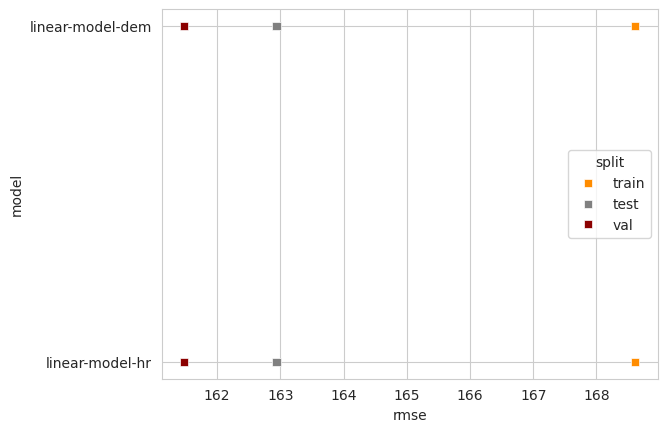

In [23]:
sns.set_style('whitegrid')
sns.scatterplot(data=perf_df.sort_values(by='rmse', ascending=False), 
                y='model', 
                x='rmse', 
                marker='s', 
                hue='split', 
                palette=['darkorange', 'grey', 'darkred'])
plt.show()

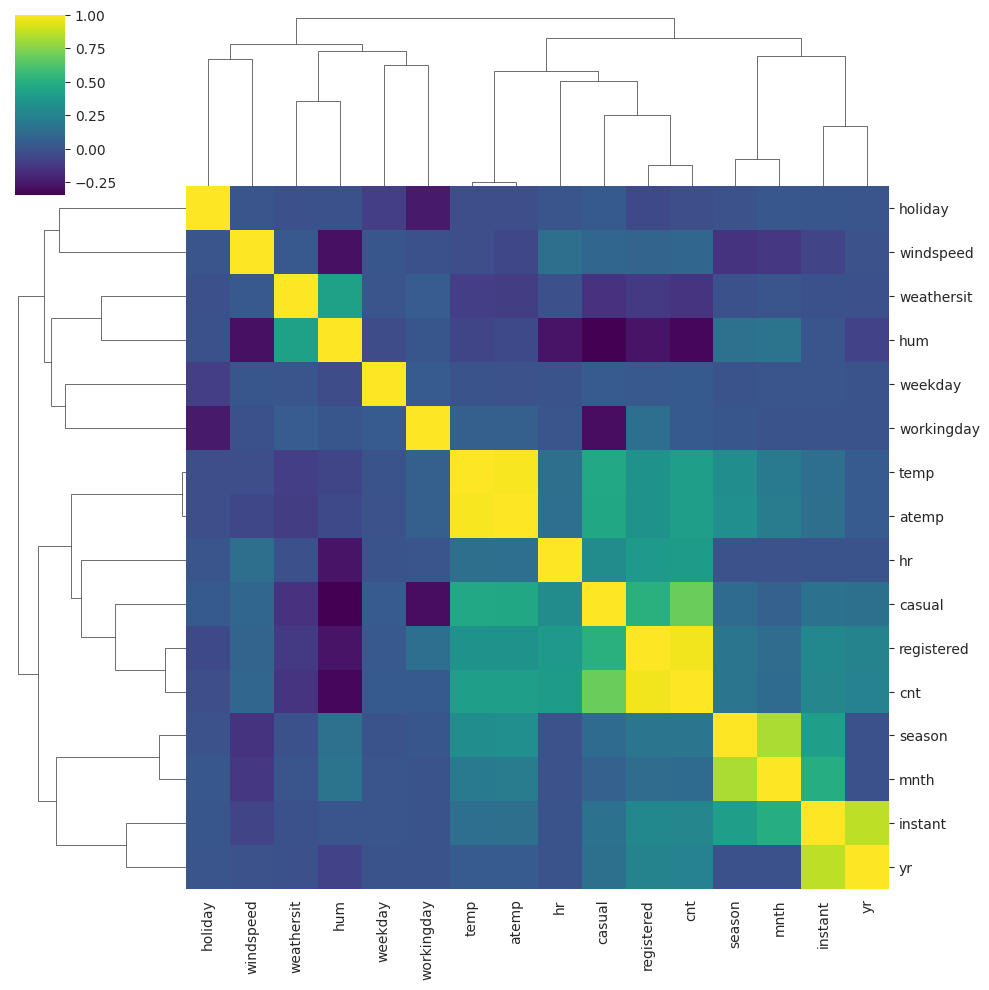

In [27]:
#sns.clustermap(data.corr(), cmap='viridis')
sns.clustermap(
        data.select_dtypes(['number']).corr(), 
        cmap="viridis"
    )